In [225]:
import os
import numpy as np
import pandas as pd
from numpy.random import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

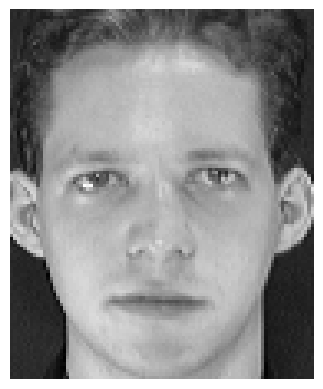

In [226]:
import cv2
import matplotlib.pyplot as plt

def read_pgm(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

def show_image(image_data):
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')  # Hide axis labels
    plt.show()

file_path = f'../ATT images/s1/1.pgm'
image_data = read_pgm(file_path)
show_image(image_data)

In [227]:
image_data.shape

(112, 92)

In [228]:
def get_data(path_data='../ATT images', test_size=0.2, is_shuffle=True):
    folders = [f's{i+1}' for i in range(40)]
    X, y = [], []

    for i in range(1, 41):
        path = path_data + f'/s{i}'
        files = os.listdir(path)
        num_files = len(files)

        if is_shuffle:
            files = shuffle(files)

        for file in os.listdir(path):
            path = path_data + f'/s{i}/' + file
            image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            pixels = np.reshape(image, [1, image.shape[0] * image.shape[1]])
            pixels = np.asarray(pixels)

            if len(X) == 0:
                X = pixels
            else:
                X = np.vstack([X, pixels])
            y.append(f's{i}')

    return X, np.asarray(y)

In [229]:
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*****

# Popular Missing Face

In [230]:
import json
with open("storage/predict_pca_tuning.json", "r") as json_file:
    face_predict = json.load(json_file)

face_predict

{'random forest': ['s21',
  's29',
  's4',
  's22',
  's10',
  's9',
  's33',
  's10',
  's27',
  's13',
  's1',
  's37',
  's6',
  's8',
  's14',
  's5',
  's37',
  's38',
  's24',
  's39',
  's8',
  's2',
  's5',
  's28',
  's24',
  's40',
  's12',
  's23',
  's27',
  's11',
  's40',
  's20',
  's27',
  's6',
  's24',
  's12',
  's12',
  's35',
  's16',
  's15',
  's39',
  's6',
  's8',
  's3',
  's9',
  's39',
  's15',
  's19',
  's3',
  's18',
  's5',
  's33',
  's34',
  's8',
  's3',
  's4',
  's23',
  's18',
  's4',
  's16',
  's13',
  's30',
  's26',
  's8',
  's11',
  's4',
  's36',
  's27',
  's5',
  's8',
  's33',
  's15',
  's1',
  's5',
  's39',
  's25',
  's23',
  's37',
  's18',
  's29'],
 'gnb': ['s21',
  's29',
  's4',
  's22',
  's10',
  's9',
  's33',
  's10',
  's27',
  's13',
  's1',
  's37',
  's6',
  's10',
  's14',
  's5',
  's35',
  's38',
  's24',
  's39',
  's8',
  's2',
  's35',
  's28',
  's1',
  's40',
  's12',
  's23',
  's27',
  's11',
  's40',
  's20',
 

In [231]:
face_predict.keys()

dict_keys(['random forest', 'gnb', 'logistic regression', 'KNN'])

In [232]:
face_predict_log = face_predict['logistic regression']
face_predict_log

acutal_face = list(y_test)
list_idx_missing = []
for i in range(len(acutal_face)):
    if acutal_face[i] != face_predict_log[i]:
        list_idx_missing.append(i)

list_idx_missing

[16]

In [233]:
def plot_gallery(title, list_tracking, real_face, prediction_face):
    n_row = len(list_tracking)
    n_col = 2
    
    fig, axes = plt.subplots(nrows=n_row, ncols=n_col,
                             figsize=(4 * n_col, 4 * n_row))
    
    # Check if axes is a 1D array (single subplot)
    if len(axes.shape) == 1:
        axes = np.expand_dims(axes, axis=0)  # Convert to 2D array if necessary

    # Check if axes is a 1D array (single subplot)
    if len(axes.shape) == 1:
        axes = np.expand_dims(axes, axis=0)  # Convert to 2D array if necessary

    for i in range(n_row):
        # plot real face
        real_face_label = real_face[list_tracking[i]]
        real_image = read_pgm(f'../ATT images/{real_face_label}/1.pgm')
        # Use correct indexing for row and column
        axes[i, 0].imshow(real_image, cmap='gray')
        axes[i, 0].set_title(real_face_label)
        axes[i, 0].axis('off')

        # plot prediction face
        prediction_face_label = prediction_face[list_tracking[i]]
        prediction_image = read_pgm(
            f'../ATT images/{prediction_face_label}/1.pgm')
        # Use correct indexing for row and column
        axes[i, 1].imshow(prediction_image, cmap='gray')
        axes[i, 1].set_title(prediction_face_label)
        axes[i, 1].axis('off')

    plt.suptitle(title)
    plt.show()

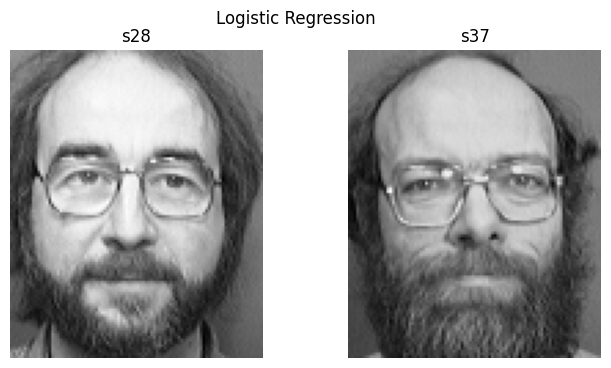

In [234]:
plot_gallery('Logistic Regression',list_idx_missing, acutal_face, face_predict_log)

## Random Forest

In [235]:
acutal_face = list(y_test)
list_idx_missing = []
face_predict_forest = face_predict['random forest']
for i in range(len(acutal_face)):
    if acutal_face[i] != face_predict_forest[i]:
        list_idx_missing.append(i)

list_idx_missing

[16, 22, 24, 54, 68]

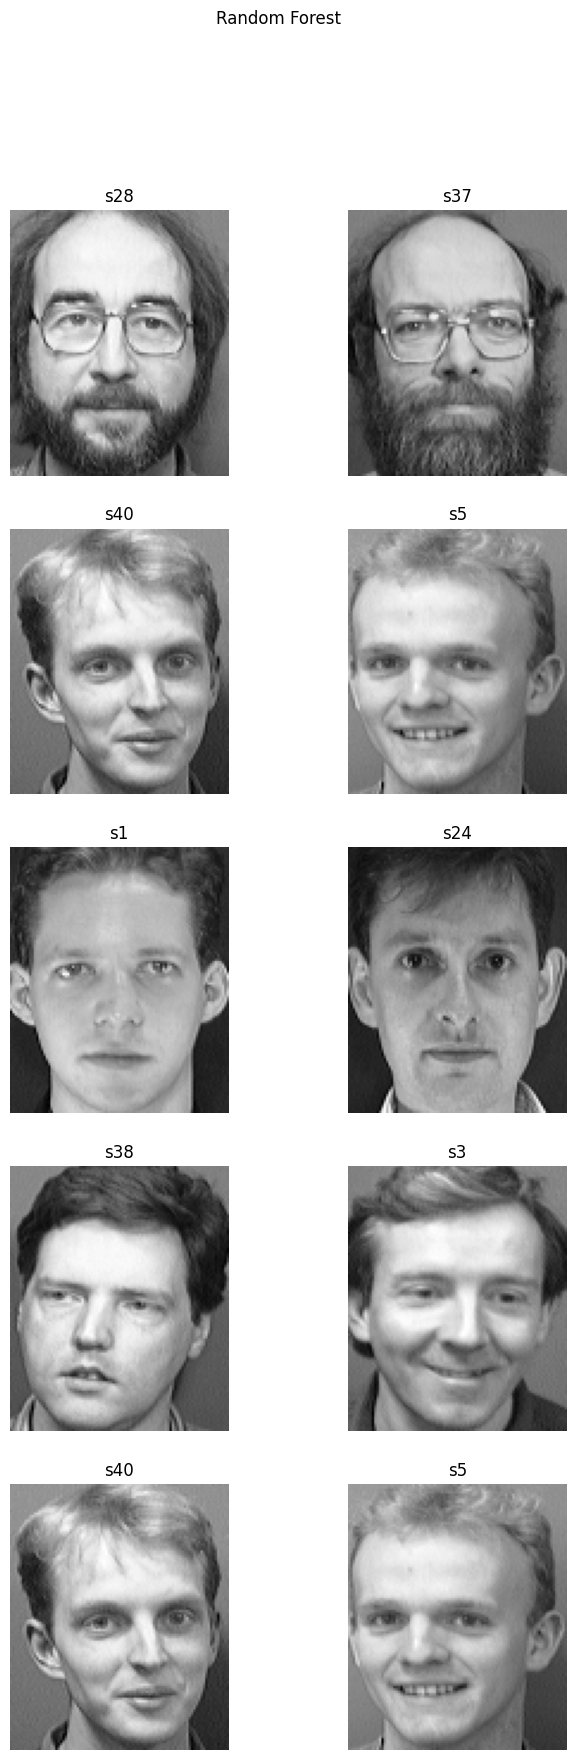

In [236]:
plot_gallery('Random Forest', list_idx_missing, acutal_face, face_predict_forest)

## Gaussian Naive Bayes

In [237]:
acutal_face = list(y_test)
list_idx_missing = []
face_predict_gnb = face_predict['gnb']
for i in range(len(acutal_face)):
    if acutal_face[i] != face_predict_gnb[i]:
        list_idx_missing.append(i)

list_idx_missing

[13, 16, 22, 53, 66]

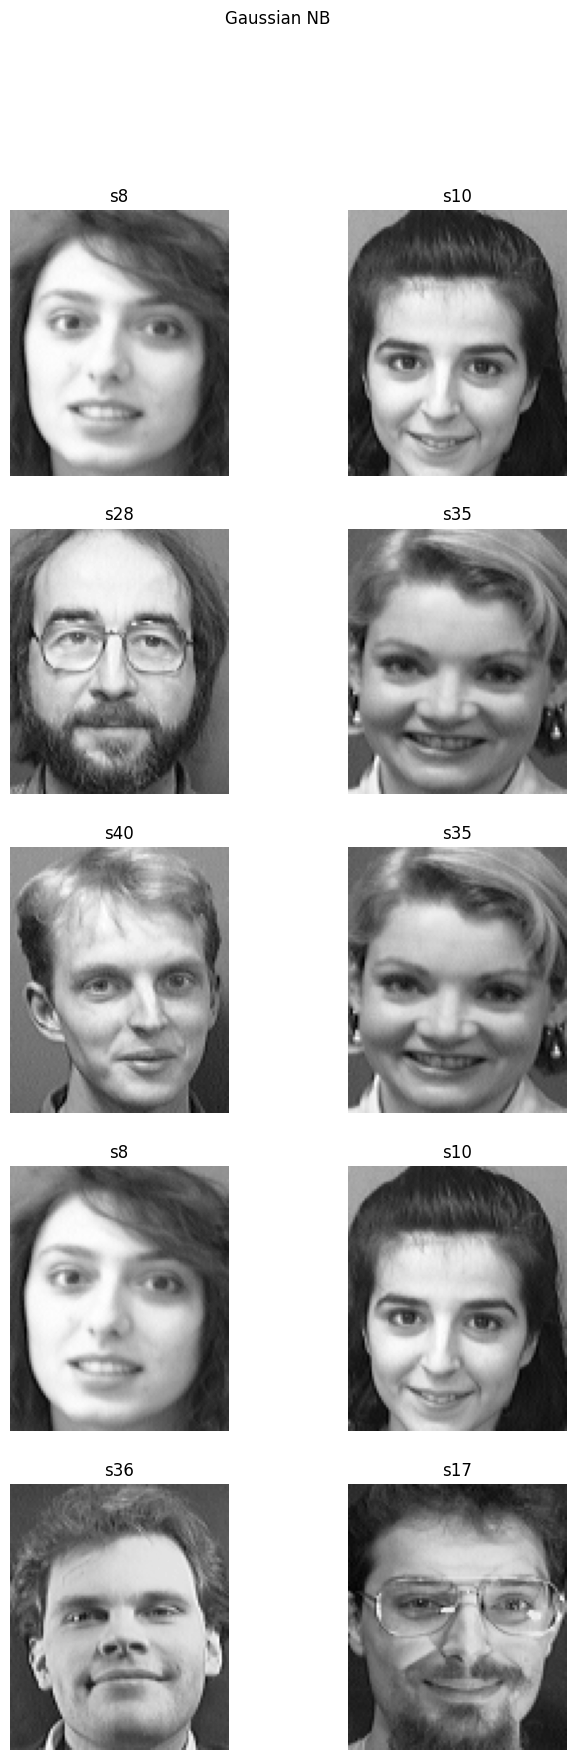

In [238]:
plot_gallery('Gaussian NB', list_idx_missing, acutal_face, face_predict_gnb)

## KNN

In [239]:
acutal_face = list(y_test)
list_idx_missing = []
face_predict_knn = face_predict['KNN']
for i in range(len(acutal_face)):
    if acutal_face[i] != face_predict_knn[i]:
        list_idx_missing.append(i)

list_idx_missing

[16, 22, 24, 43, 68]

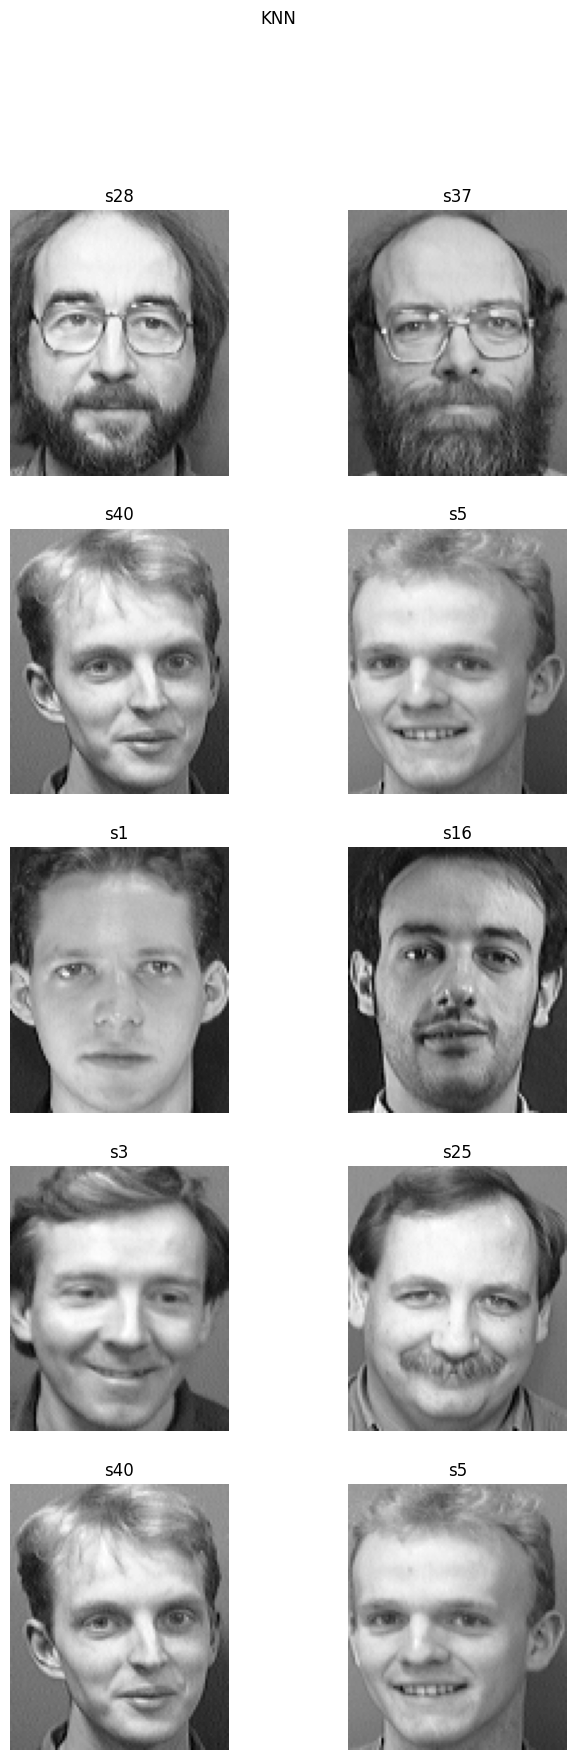

In [240]:
plot_gallery('KNN', list_idx_missing, acutal_face, face_predict_knn)